In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
trainDir = 'C:/Users/Superman/Downloads/archive/seg_train/seg_train'
testDir = 'C:/Users/Superman/Downloads/archive/seg_test/seg_test'

In [3]:
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1/255.,rotation_range=30,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1/255.)

train_generator = train_datagen.flow_from_directory(trainDir,
                                                    target_size=(150, 150),
                                                    batch_size=batch_size,
                                                    shuffle=True,
                                                    class_mode='sparse')

test_generator = test_datagen.flow_from_directory(testDir,
                                                  target_size=(150, 150),
                                                  batch_size=batch_size,
                                                  shuffle=False,
                                                  class_mode='sparse')

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [4]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, Dropout

In [5]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape = (150,150, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3,3), activation = 'relu')) 
model.add(MaxPooling2D())

model.add(Conv2D(256, (3,3), activation = 'relu')) 
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(6, activation = 'softmax'))

In [6]:
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [7]:
history = model.fit(train_generator, validation_data=test_generator, epochs=20

Epoch 1/20
439/439 [==============================] - 692s 2s/step - loss: 1.1872 - accuracy: 0.5222 - val_loss: 0.9001 - val_accuracy: 0.6317
Epoch 2/20
439/439 [==============================] - 682s 2s/step - loss: 0.9002 - accuracy: 0.6608 - val_loss: 0.6713 - val_accuracy: 0.7610
Epoch 3/20
439/439 [==============================] - 694s 2s/step - loss: 0.7938 - accuracy: 0.7093 - val_loss: 0.6346 - val_accuracy: 0.7737
Epoch 4/20
439/439 [==============================] - 691s 2s/step - loss: 0.7168 - accuracy: 0.7456 - val_loss: 0.5229 - val_accuracy: 0.8210
Epoch 5/20
439/439 [==============================] - 698s 2s/step - loss: 0.6579 - accuracy: 0.7649 - val_loss: 0.5302 - val_accuracy: 0.8177
Epoch 6/20
439/439 [==============================] - 691s 2s/step - loss: 0.6217 - accuracy: 0.7802 - val_loss: 0.5478 - val_accuracy: 0.8093
Epoch 7/20
439/439 [==============================] - 852s 2s/step - loss: 0.5973 - accuracy: 0.7890 - val_loss: 0.4600 - val_accuracy: 0.8400

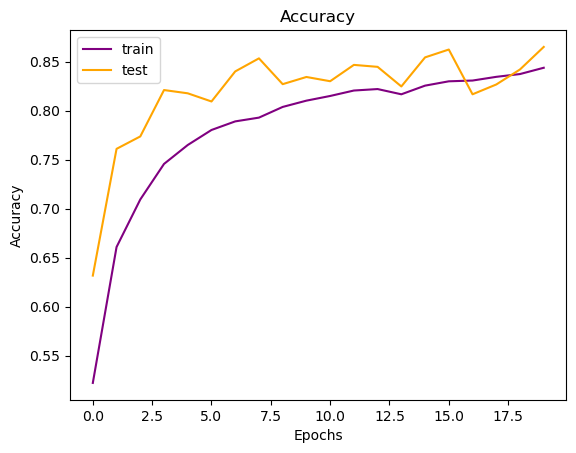

In [8]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"],c = "purple")
plt.plot(history.history["val_accuracy"],c = "orange")
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["train", "test"])
plt.show()

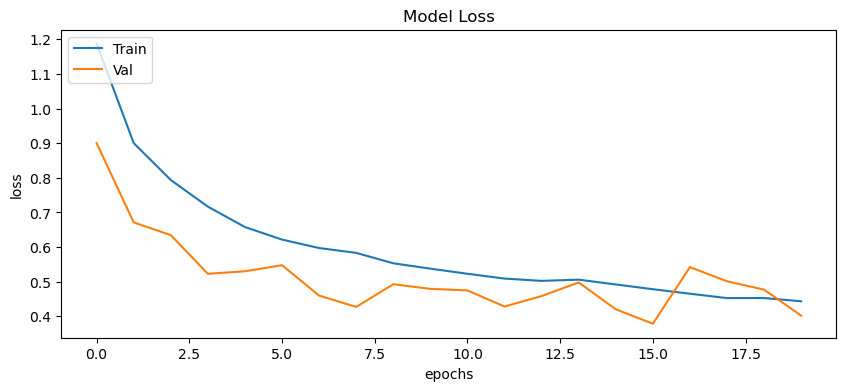

In [9]:
plt.figure(figsize=(10,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Train','Val'], loc= 'upper left')
plt.show()

In [15]:
import numpy as np
predictions = model.predict(test_generator)

# Get the predicted class for each image
predicted_classes = np.argmax(predictions, axis=1)

print('Predicted classes:', predicted_classes)
print('True labels:', test_generator.classes)

94/94 [==============================] - 28s 298ms/step
Predicted classes: [0 0 0 ... 3 5 5]
True labels: [0 0 0 ... 5 5 5]


In [18]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print('Accuracy:\n', accuracy_score(test_generator.classes, predicted_classes)*100)

Accuracy:
 86.5


In [19]:
print('Classification Report:\n', classification_report(test_generator.classes, predicted_classes))

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.88      0.83       437
           1       0.96      0.97      0.97       474
           2       0.85      0.82      0.83       553
           3       0.82      0.81      0.82       525
           4       0.92      0.82      0.87       510
           5       0.86      0.90      0.88       501

    accuracy                           0.86      3000
   macro avg       0.87      0.87      0.87      3000
weighted avg       0.87      0.86      0.86      3000

